In [1]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import nltk 
nltk.downloader.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

embeddings_dict = {}
with open("glove.840B.300d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = ''.join(values[:-300])
        vector = np.asarray(values[-300:], dtype='float32')        
        embeddings_dict[word] = vector

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Green\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


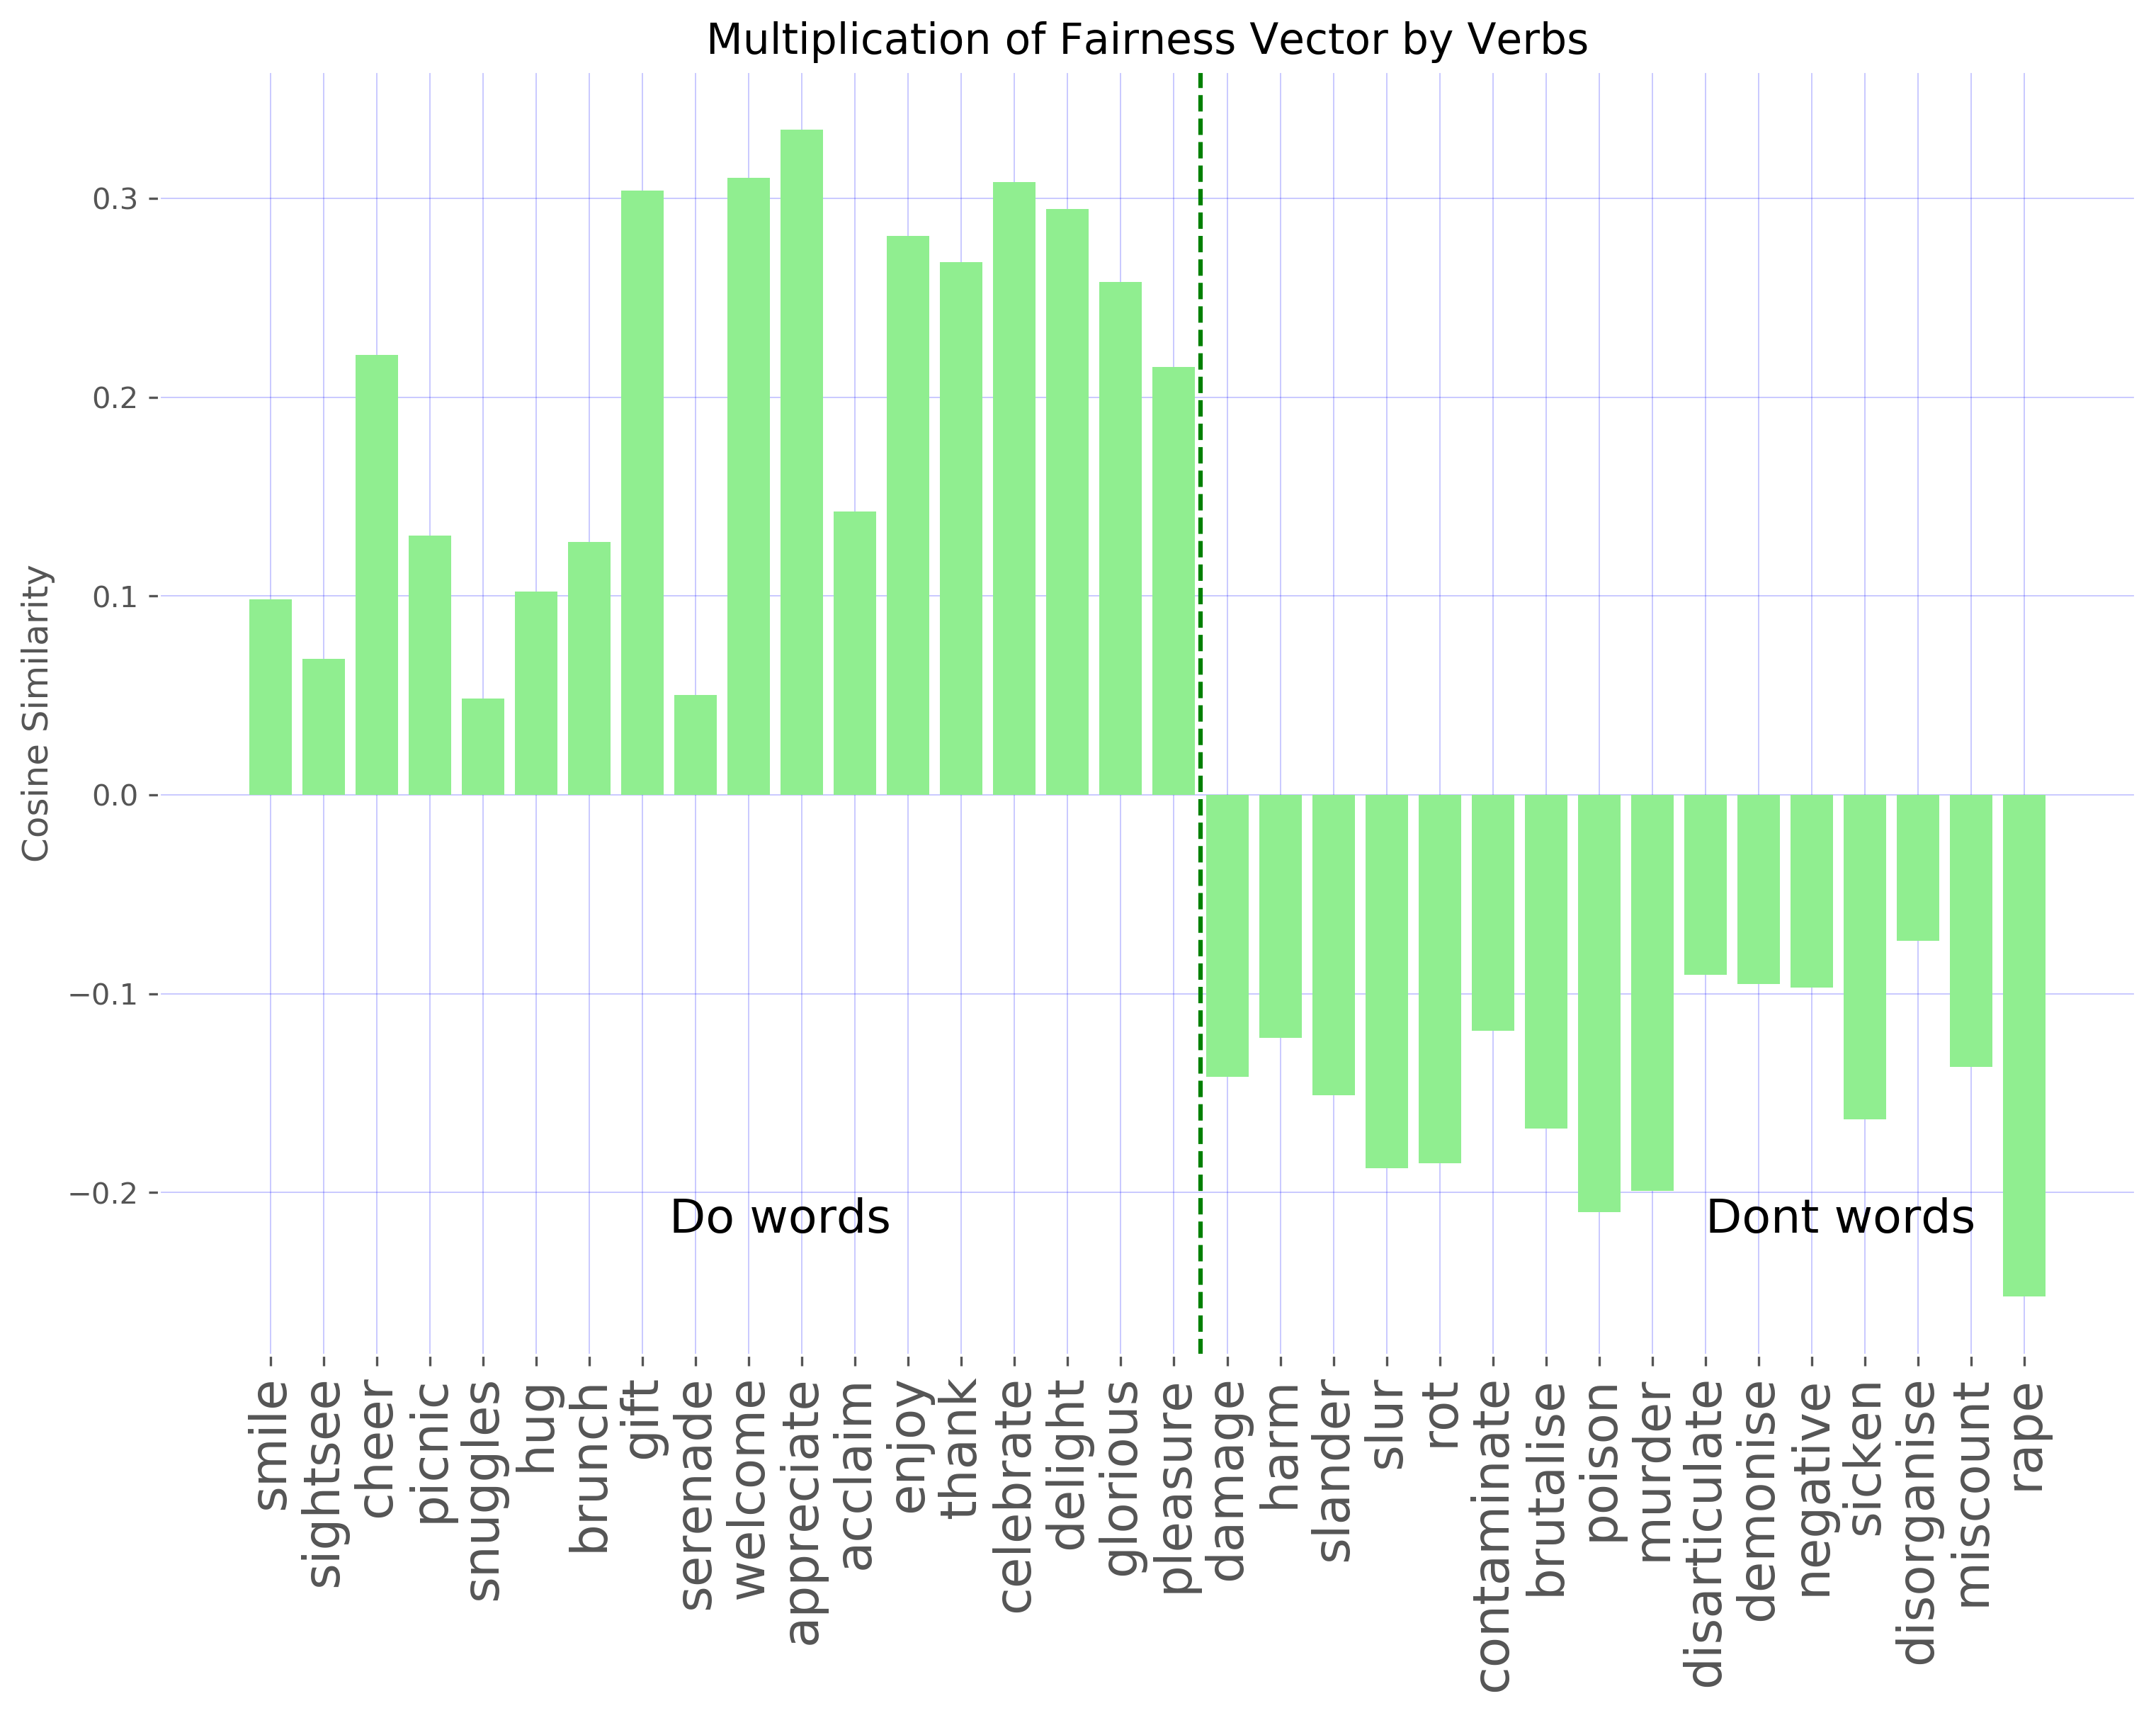

[[1.         0.84939202]
 [0.84939202 1.        ]]


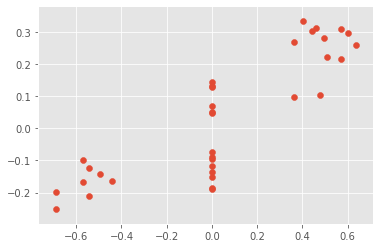

In [41]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]

vector1 = embeddings_dict["responsibility"] + embeddings_dict["joy"] + embeddings_dict["beneficial"]  \
+ embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harmful"] - embeddings_dict["pain"]\
- embeddings_dict["irresponsibility"]  
ss=[]
numsp=[]
plot_index=[]
ind = 0
while ind < 18:
#ind = 0
    good = good_verbs[ind]
    vector2 = embeddings_dict[good]
    cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    compound=sid.polarity_scores(good)['compound']
    ss.append(compound)     
    ind = ind + 1
    numsp.append(cosine_similarity)
    plot_index.append(good)

    
ind2 = 0
while ind2 < 16:
    bad = bad_verbs[ind2]
    vector2 = embeddings_dict[bad]
    cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    compound=sid.polarity_scores(bad)['compound']
    ss.append(compound)
    ind2= ind2 + 1
    numsp.append(cosine_similarity)
    plot_index.append(bad)
    

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=17.5, ls='--', color='green')
plt.ylabel('Cosine Similarity')
plt.title('Multiplication of Fairness Vector by Verbs')
y_pos = range(len(plot_index))
plt.bar(y_pos, numsp, color='lightgreen')
plt.xticks(y_pos, plot_index, rotation=90, fontsize=17)
plt.text(7.5, -0.22, "Do words",fontsize=16)
plt.text(27, -0.22, "Dont words",fontsize=16)
plt.show()

print(np.corrcoef(ss, numsp))

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(ss, numsp)
plt.show()


schmooze -0.009765354916453362
preconcert -0.06227889657020569
nuzzle -0.010110917501151562
unbend -0.03835884854197502
effuse -0.04795575514435768
sparer -0.07631848752498627
spellbind -0.06412795931100845
96
incorrect dont_word destroy 0.014695344492793083


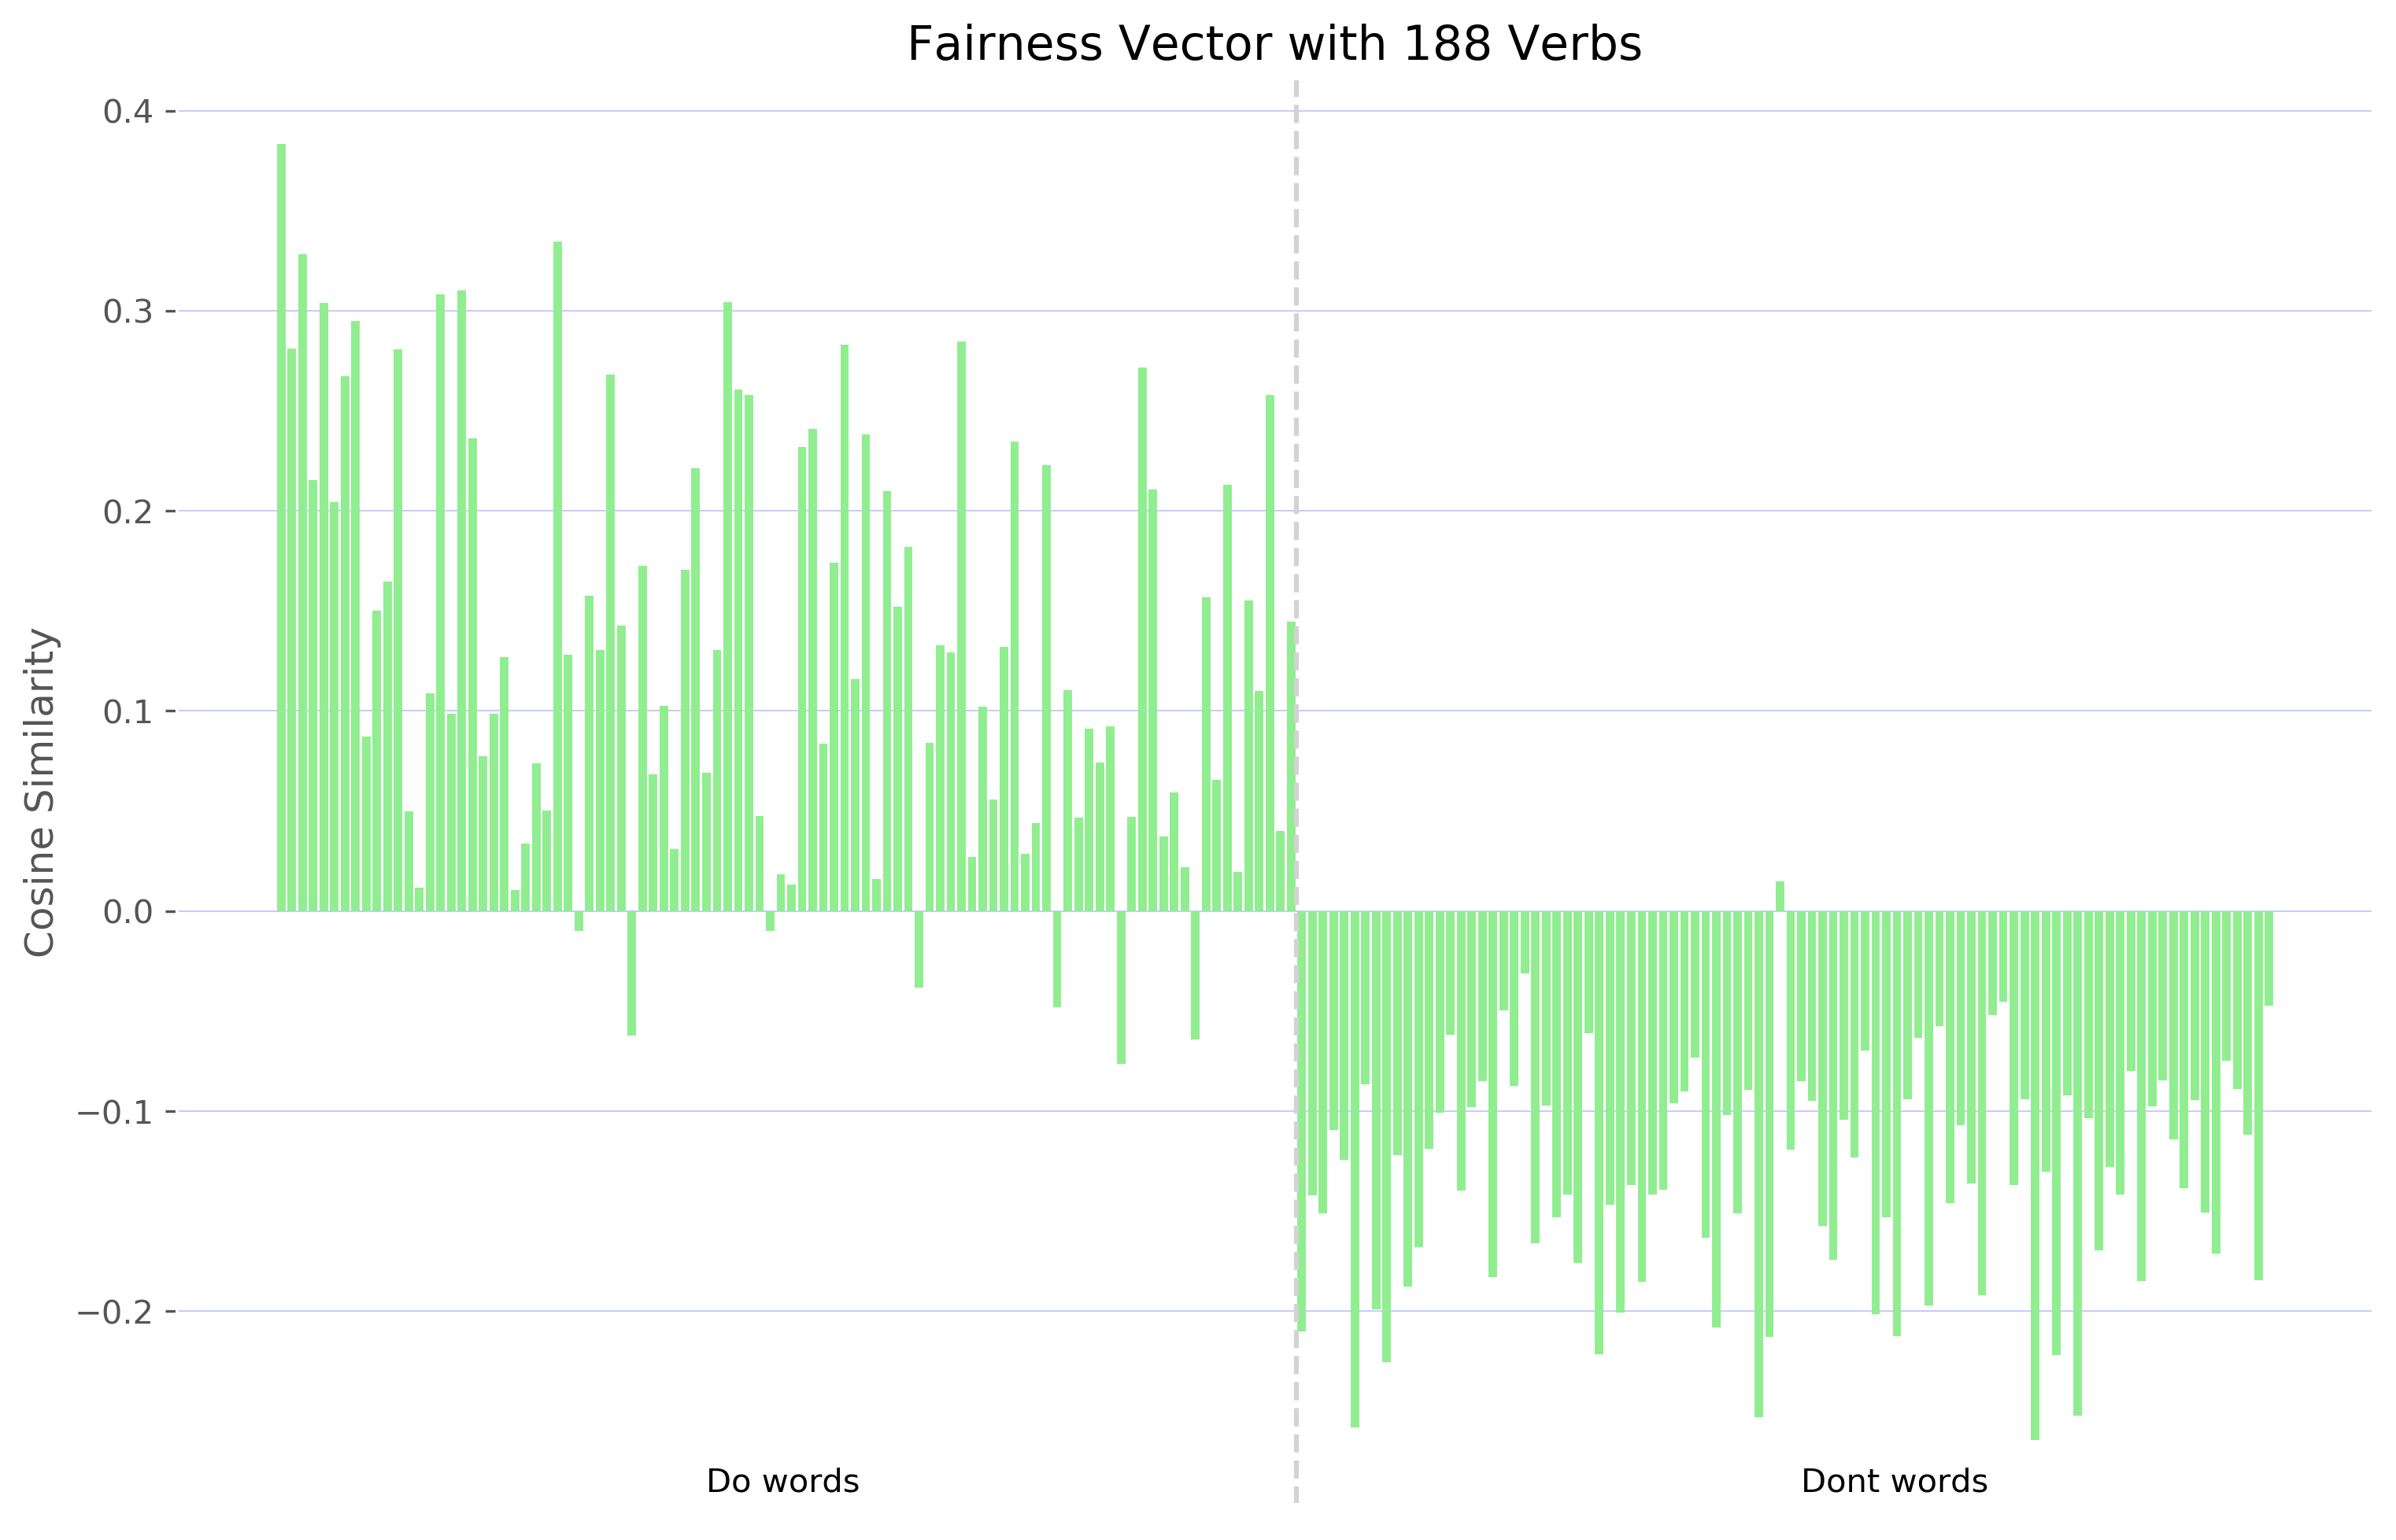

Correlation 
 [[1.         0.70622598]
 [0.70622598 1.        ]]


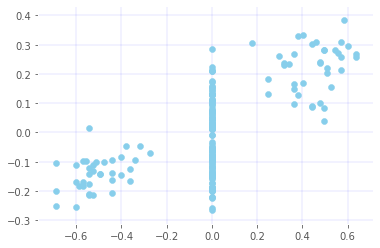

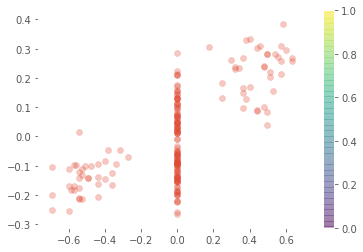

In [44]:
    
filename_do = 'do_words.txt'
filename_dont = 'dont_words.txt'
data_dont_words = np.loadtxt(filename_dont, delimiter='\n', dtype=str)
data_do_words = np.loadtxt(filename_do, delimiter='\n', dtype=str)

vector1b = embeddings_dict["responsibility"] + embeddings_dict["joy"] + embeddings_dict["beneficial"]  \
+ embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harmful"] - embeddings_dict["pain"]\
- embeddings_dict["irresponsibility"] 

cosine_result=[]
plot_index_y_axis=[]
sentiment=[]
index = 0

word_and_cosine=[]

while index < 96:
    do_words = data_do_words[index]
    vector3b = embeddings_dict[do_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1b, vector3b)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(do_words)
    compound_score=sid.polarity_scores(do_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([do_words,cosine_similarity_score])
    
    
    if cosine_similarity_score < 0:
        print(do_words, cosine_similarity_score)
        
print(len(plot_index_y_axis))
index = 0
while index < 92:
    dont_words = data_dont_words[index]
    vector3b = embeddings_dict[dont_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1b, vector3b)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(dont_words)
    compound_score=sid.polarity_scores(dont_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([dont_words,cosine_similarity_score])

    if cosine_similarity_score > 0:
        print('incorrect dont_word',dont_words, cosine_similarity_score)
        
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.axvline(x=95.5, ls='--', color='lightgrey')

plt.ylabel('Cosine Similarity')
plt.title('Fairness Vector with 188 Verbs')
y_pos_range = range(len(plot_index_y_axis))
plt.bar(y_pos_range, cosine_result, color='lightgreen')
plt.text(40, -0.29, "Do words")
plt.text(143, -0.29, "Dont words")
plt.xticks([])
plt.show()

print('Correlation \n', np.corrcoef(sentiment, cosine_result))

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.scatter(sentiment, cosine_result, c='skyblue')
plt.show()

plt.scatter(sentiment, cosine_result,  alpha=0.3,
            cmap='viridis')
plt.colorbar(); 


In [193]:
print(y_pos_range)


range(0, 188)


In [3]:
sorted_word_and_cos_list=[]
sorted_word_and_cos_list= (sorted(word_and_cosine,key=lambda x: (x[1])))
top_ten = sorted_word_and_cos_list[-15 : ] 
bottom_ten = sorted_word_and_cos_list[:15 ] 
top_and_bottom=top_ten+bottom_ten


x, y = zip(*top_and_bottom)

x_index=range(len(x))
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'
plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.axvline(x=14.5, ls='--', color='lightgrey')
plt.xticks(x_index, x, rotation=90)
plt.bar(x_index, y, color='skyblue')
plt.ylabel('Cosine Similarity')
plt.text(7, -0.29, "Do words")
plt.text(21, -0.29, "Dont words")

plt.show()


NameError: name 'word_and_cosine' is not defined

In [ ]:
word_list=[]
cosine_list=[]



for values in top_and_bottom:
    word_list.append(top_and_bottom[[values][0]])
    cosine_list.append(top_and_bottom[[0][values]])
x_range = range(len(word_list))    
print(x_range)
print(word_list)
print(cosine_list)
plt.xticks(y_pos_range, plot_index_y_axis, rotation=90)
   

In [11]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]


run=0

plt.subplot(2,2,4)

while run < 4:
    if run == 0:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"]
    elif run == 1:
        vector1 = embeddings_dict["joy"] - embeddings_dict["pain"]
    elif run == 2:
        vector1 = embeddings_dict["beneficial"] - embeddings_dict["harmful"] 
    elif run == 3:
        vector1 = embeddings_dict["responsibility"]- embeddings_dict["irresponsibility"] 
    run = run + 1


    nums=[]
    plot_index=[]
    ind = 0
    colour_check=[]
    while ind < 18:
    #ind = 0
        good = good_verbs[ind]
        vector2 = embeddings_dict[good]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(good, cosine_similarity)
        ind = ind + 1
        nums.append(cosine_similarity)
        plot_index.append(good)

    ind2 = 0
    while ind2 < 16:
    #ind = 0
        bad = bad_verbs[ind2]
        vector2 = embeddings_dict[bad]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(bad, cosine_similarity)
        ind2= ind2 + 1
        nums.append(cosine_similarity)
        plot_index.append(bad)


    plt.rcParams['figure.figsize'] = [30, 30]
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.facecolor"] = 'white'
    plt.rcParams["axes.facecolor"] = 'white'
    plt.rcParams["savefig.facecolor"] = 'black'
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.axvline(x=17.5, ls='--', color='grey')
     
    
           
   
        
    plt.subplot(2,2,run)
   
    y_pos = range(len(plot_index))
    
    
    plt.bar(y_pos, nums, color='lightgreen')
  
    
    plt.ylabel('Cosine Similarity', color='black', fontsize=30) 
    if run == 1:
        plt.title('Liberty - Prison', color='black', y=1.2, fontsize=30)
    elif run == 2: 
        plt.title('Joy - Pain', color='black', y=1.2, fontsize=30)
    elif run == 3:
        plt.title('Beneficial - Harmful', color='black', y=1.2, fontsize=30)
    elif run == 4:
        plt.title('Responsibility - Irresponsibility', color='black', y=1.2, fontsize=30)
        
    plt.xticks(y_pos, plot_index, rotation=90, fontsize=22)
    plt.text(7.5, -0.29, "Do words",fontsize=20)
    plt.text(27, -0.29, "Dont words",fontsize=20)
plt.tight_layout(pad = 2) 

plt.show()
    
    
    



C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


C:\Users\Green\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


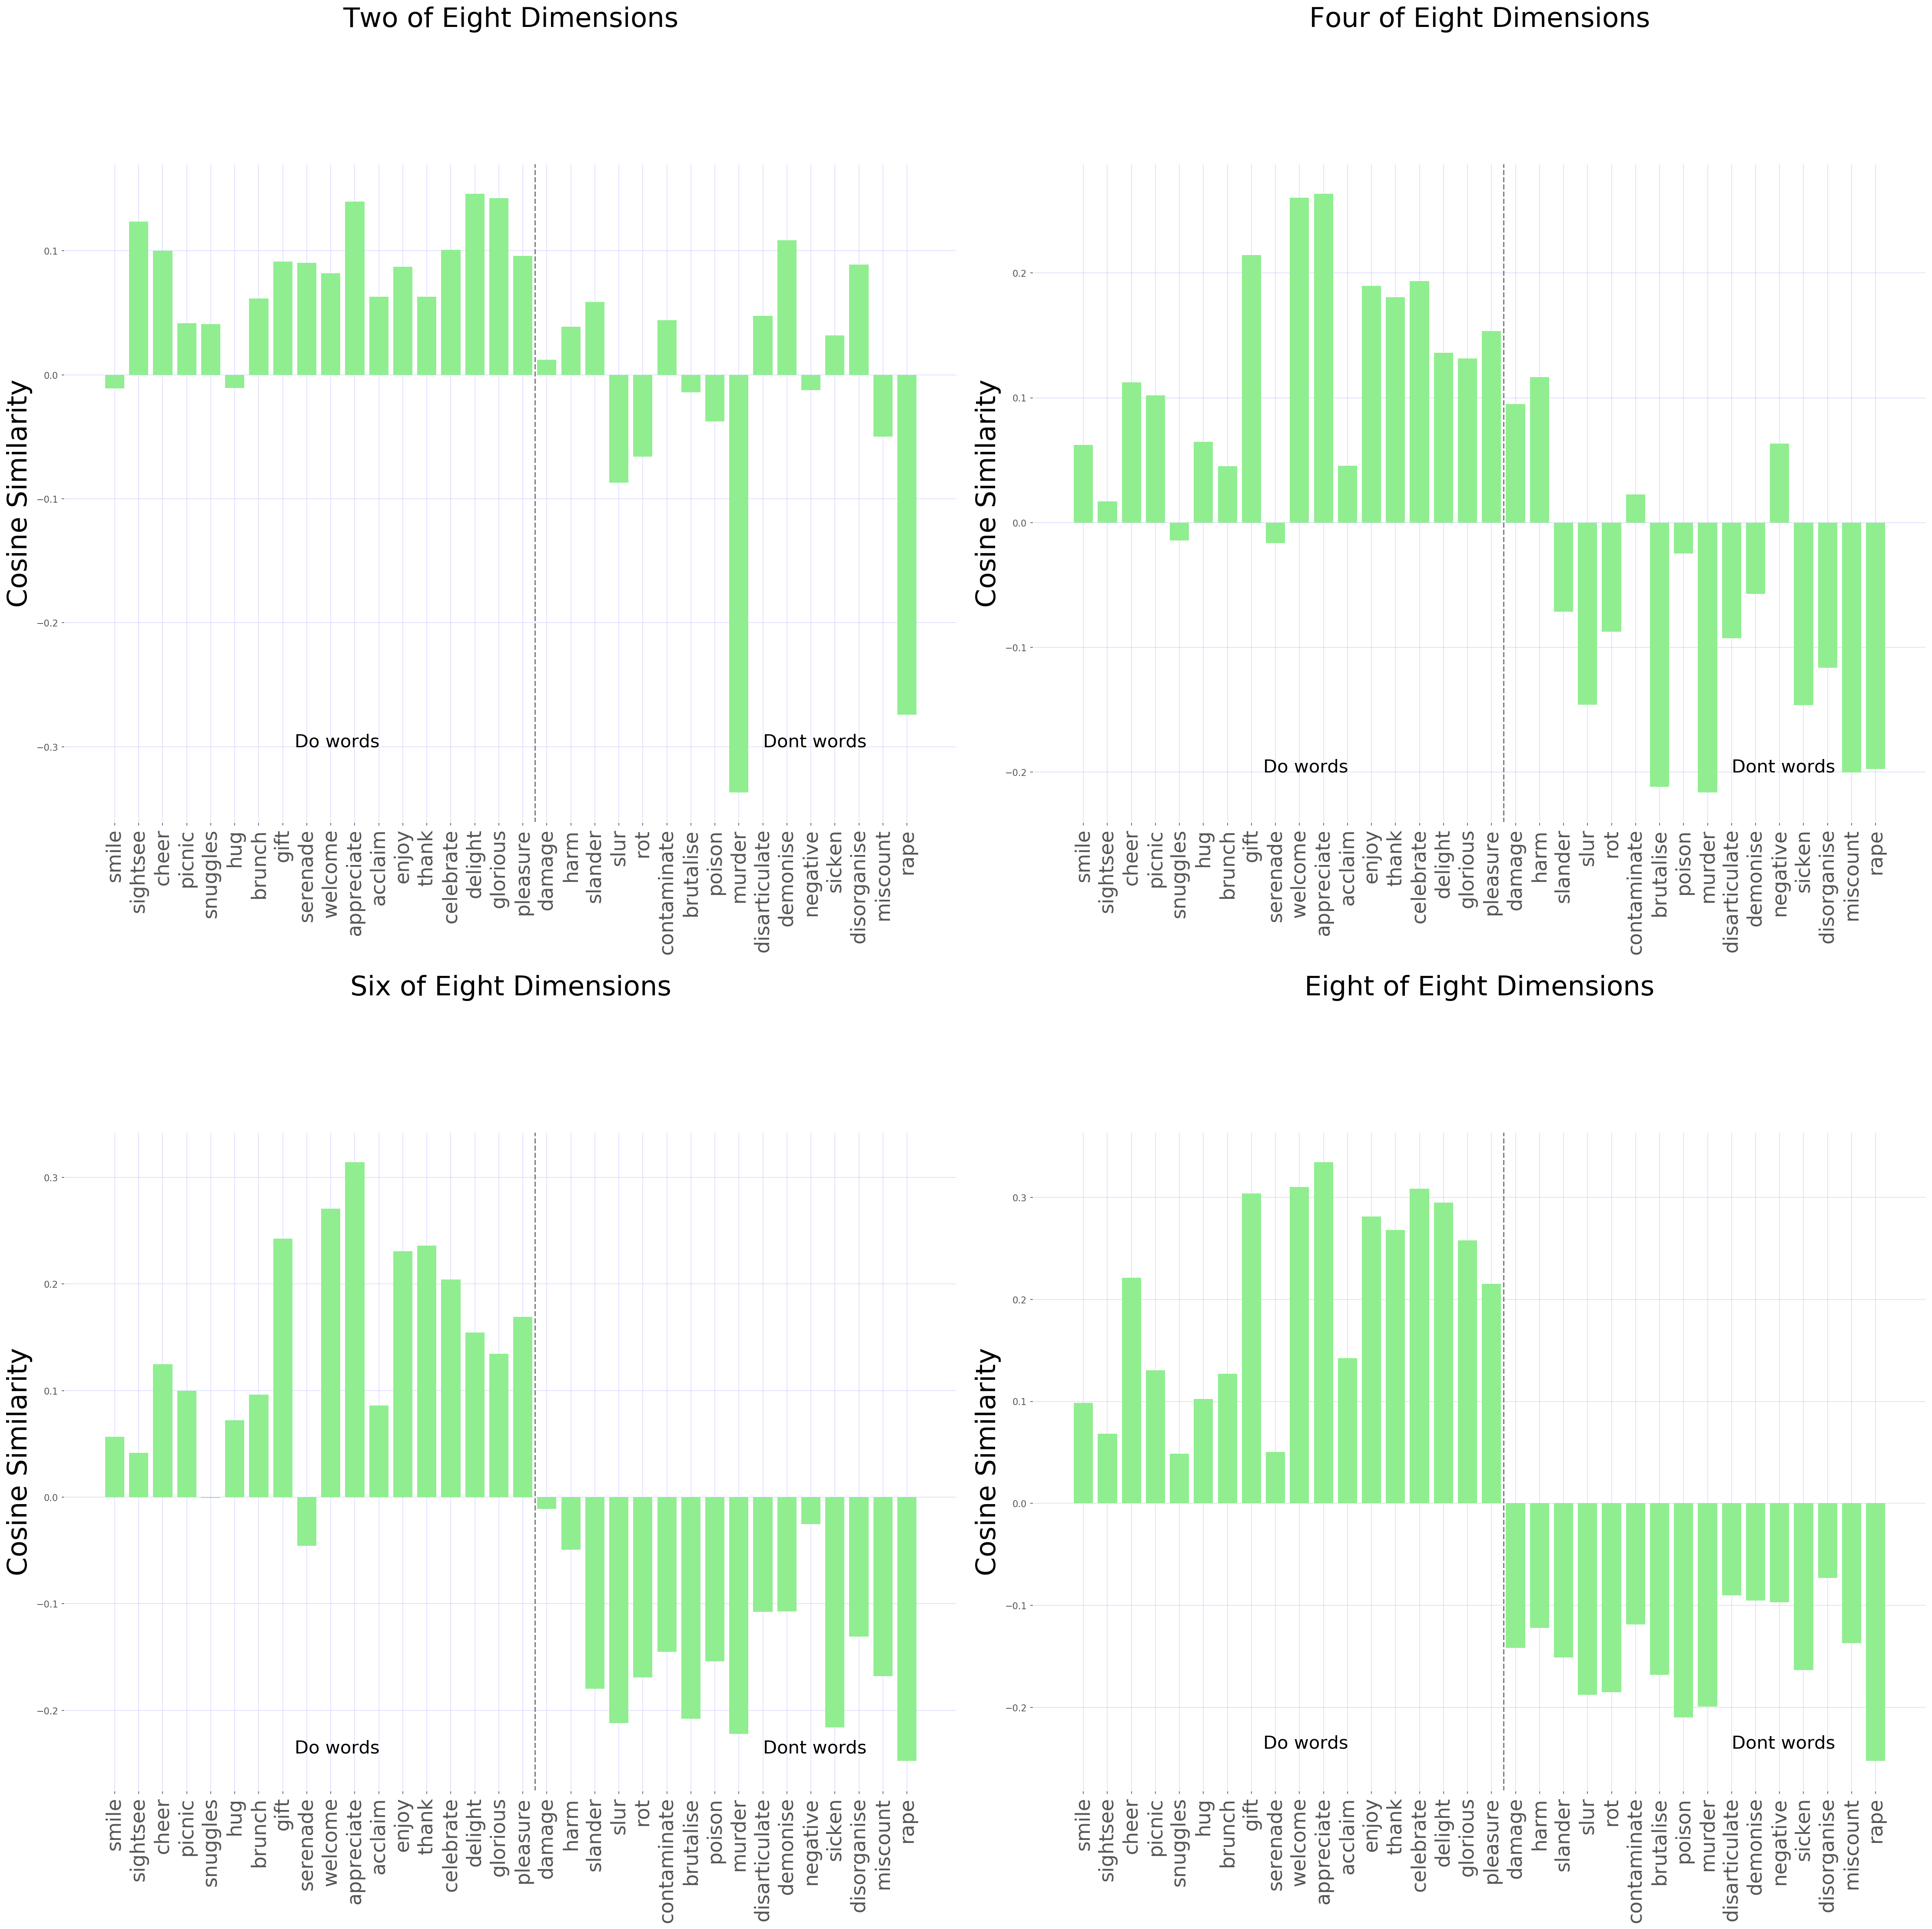

In [31]:
good_verbs = ["smile", "sightsee", "cheer","picnic", "snuggles", "hug", "brunch", "gift", "serenade","welcome",
             "appreciate", "acclaim", "enjoy", "thank", "celebrate", "delight", "glorious", "pleasure"]
bad_verbs = ["damage", "harm", "slander", "slur", "rot", "contaminate", "brutalise", "poison", "murder",
            "disarticulate","demonise","negative","sicken","disorganise","miscount","rape"]


run=0

plt.subplot(2,2,4)
run=0

while run < 4:
    if run == 0:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"] 
    elif run == 1:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"] + embeddings_dict["responsibility"]- embeddings_dict["irresponsibility"] 
    elif run == 2:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"] + embeddings_dict["responsibility"]- embeddings_dict["irresponsibility"] + embeddings_dict["beneficial"] - embeddings_dict["harmful"] 
    elif run == 3:
        vector1 = embeddings_dict["liberty"] - embeddings_dict["prison"] + embeddings_dict["responsibility"]- embeddings_dict["irresponsibility"] + embeddings_dict["beneficial"] - embeddings_dict["harmful"] + embeddings_dict["joy"] - embeddings_dict["pain"]
    run = run + 1

    
    nums=[]
    plot_index=[]
    ind = 0
    colour_check=[]
    while ind < 18:
    #ind = 0
        good = good_verbs[ind]
        vector2 = embeddings_dict[good]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(good, cosine_similarity)
        ind = ind + 1
        nums.append(cosine_similarity)
        plot_index.append(good)

    ind2 = 0
    while ind2 < 16:
    #ind = 0
        bad = bad_verbs[ind2]
        vector2 = embeddings_dict[bad]
        cosine_similarity = 1 - spatial.distance.cosine(vector1, vector2)
    #    print(bad, cosine_similarity)
        ind2= ind2 + 1
        nums.append(cosine_similarity)
        plot_index.append(bad)


    plt.rcParams['figure.figsize'] = [30, 30]
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.facecolor"] = 'white'
    plt.rcParams["axes.facecolor"] = 'white'
    plt.rcParams["savefig.facecolor"] = 'black'
    plt.grid(color='b', linestyle='-', linewidth=0.1)
    plt.axvline(x=17.5, ls='--', color='grey')
     
    
           
   
        
    plt.subplot(2,2,run)
   
    y_pos = range(len(plot_index))
    
    
    plt.bar(y_pos, nums, color='lightgreen')
  
    
    plt.ylabel('Cosine Similarity', color='black', fontsize=30) 
    if run == 1:
        plt.title('Two of Eight Dimensions', color='black', y=1.2, fontsize=30)
        plt.text(7.5, -0.3, "Do words",fontsize=20)
        plt.text(27, -0.3, "Dont words",fontsize=20)
    elif run == 2: 
        plt.title('Four of Eight Dimensions', color='black', y=1.2, fontsize=30)
        plt.text(7.5, -0.2, "Do words",fontsize=20)
        plt.text(27, -0.2, "Dont words",fontsize=20)
    elif run == 3:
        plt.title('Six of Eight Dimensions', color='black', y=1.2, fontsize=30)
        plt.text(7.5, -0.24, "Do words",fontsize=20)
        plt.text(27, -0.24, "Dont words",fontsize=20)
    elif run == 4:
        plt.title('Eight of Eight Dimensions', color='black', y=1.2, fontsize=30)
        plt.text(7.5, -0.24, "Do words",fontsize=20)
        plt.text(27, -0.24, "Dont words",fontsize=20)
        
    plt.xticks(y_pos, plot_index, rotation=90, fontsize=22)
    
plt.tight_layout(pad = 2) 

plt.show()
    
    
    



In [ ]:
import numpy as np
from gensim import models
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
embeddings_dict = {}

w = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
vector1=w["responsibility"] +w["joy"] + w["gaining"] +w["beneficial"] + w["liberty"] - w["prison"] -w["harmful"] - w["pain"] - w["irresponsibility"] 

In [ ]:
 filename_do = 'do_words.txt'
filename_dont = 'dont_words.txt'
data_dont_words = np.loadtxt(filename_dont, delimiter='\n', dtype=str)
data_do_words = np.loadtxt(filename_do, delimiter='\n', dtype=str)


#vector1b=  embeddings_dict["responsiblity"] + embeddings_dict["joyful"] + embeddings_dict["benefit"]  + embeddings_dict["liberty"] - embeddings_dict["prison"] - embeddings_dict["harm"] - embeddings_dict["paining"] - embeddings_dict["irresponsible"]  

cosine_result=[]
plot_index_y_axis=[]
sentiment=[]
index = 0

word_and_cosine=[]

while index < 96:
#ind = 0
    do_words = data_do_words[index]
    vector3b = w[do_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1, vector3b)
#    print(good, cosine_similarity)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(do_words)
    compound_score=sid.polarity_scores(do_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([do_words,cosine_similarity_score])
    
    
    if cosine_similarity_score < 0:
        print(do_words, cosine_similarity_score)
print(len(plot_index_y_axis))
index = 0
while index < 92:
#ind = 0
    dont_words = data_dont_words[index]
    vector3b = w[dont_words]
    cosine_similarity_score = 1 - spatial.distance.cosine(vector1, vector3b)
#    print(good, cosine_similarity)
    index = index + 1
    cosine_result.append(cosine_similarity_score)
    plot_index_y_axis.append(dont_words)
    compound_score=sid.polarity_scores(dont_words)['compound']
    sentiment.append(compound_score)
    
    word_and_cosine.append([dont_words,cosine_similarity_score])

    if cosine_similarity_score > 0:
        print('incorrect dont_word',dont_words, cosine_similarity_score)
        
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'


plt.grid(color='b', linestyle='-', linewidth=0.1)
#ax.grid(b = True, color ='grey', 
#        linestyle ='-.', linewidth = 0.5, 
#        alpha = 0.2) 
#plt.set_axis_bgcolor('white')

plt.axvline(x=95.5, ls='--', color='lightgrey')

plt.ylabel('Cosine Similarity')
plt.title('Fairness Vector with 188 Verbs')
y_pos_range = range(len(plot_index_y_axis))
plt.bar(y_pos_range, cosine_result, color='lightgreen')
#plt.xticks(y_pos_range, plot_index_y_axis, rotation=90)
plt.text(40, -0.29, "Do words")
plt.text(143, -0.29, "Dont words")
plt.xticks([])
plt.show()

print('Correlation \n', np.corrcoef(sentiment, cosine_result))

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
#plt.rcParams["savefig.facecolor"] = 'white'
plt.grid(color='b', linestyle='-', linewidth=0.1)


plt.scatter(sentiment, cosine_result, c='skyblue')
plt.show()

plt.scatter(sentiment, cosine_result,  alpha=0.3,
            cmap='viridis')
plt.colorbar(); 

sorted_word_and_cos_list=[]
sorted_word_and_cos_list= (sorted(word_and_cosine,key=lambda x: (x[1])))
top_ten = sorted_word_and_cos_list[-15 : ] 
bottom_ten = sorted_word_and_cos_list[:15 ] 
#print(top_ten)
#print(bottom_ten)
top_and_bottom=top_ten+bottom_ten
#print(top_and_bottom)

x, y = zip(*top_and_bottom)

#print(top_and_bottom)
x_index=range(len(x))
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams["figure.facecolor"] = 'white'
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["savefig.facecolor"] = 'black'
plt.grid(color='b', linestyle='-', linewidth=0.1)

plt.axvline(x=14.5, ls='--', color='lightgrey')
plt.xticks(x_index, x, rotation=90)
plt.bar(x_index, y, color='skyblue')
plt.ylabel('Cosine Similarity')
plt.text(7, -0.29, "Do words")
plt.text(21, -0.29, "Dont words")

plt.show()
print(np.matrix(top_and_bottom))

[['thrill' '0.20145155489444733']
 ['welcome' '0.2018647938966751']
 ['vision' '0.2061532586812973']
 ['yearn' '0.21132293343544006']
 ['zest' '0.21412865817546844']
 ['spirit' '0.21659862995147705']
 ['celebrate' '0.22015692293643951']
 ['dream' '0.2332918792963028']
 ['congratulate' '0.23489052057266235']
 ['appreciate' '0.2408839911222458']
 ['love' '0.24129372835159302']
 ['enjoy' '0.26639166474342346']
 ['cherish' '0.2667475938796997']
 ['pride' '0.303190141916275']
 ['joy' '0.3322727084159851']
 ['outgas' '-0.20817367732524872']
 ['gangrene' '-0.1966393142938614']
 ['rape' '-0.19094836711883545']
 ['aggravate' '-0.19072721898555756']
 ['callous' '-0.18801718950271606']
 ['rearrest' '-0.1861640363931656']
 ['necrotising' '-0.1811591237783432']
 ['exacerbate' '-0.17771875858306885']
 ['mess' '-0.16887293756008148']
 ['rot' '-0.16649985313415527']
 ['spill' '-0.1570662558078766']
 ['torture' '-0.14673477411270142']
 ['disfigure' '-0.14461581408977509']
 ['murder' '-0.142771378159523